#### Decision Tree Algorithm?
A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It splits the dataset into subsets based on the most significant attributes/features by asking yes/no questions at each node. These splits are determined using criteria like Gini impurity, information gain, or mean squared error.

Each internal node in a decision tree represents a "test" on a feature, and each leaf node represents the final decision (in classification) or value (in regression).

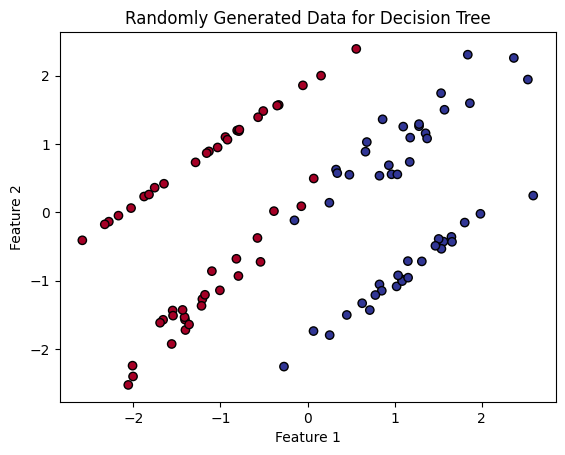

In [1]:
## Generate Random Data and Plot a Decision Tree-Solvable Dataset
## Here, we'll create a 2D dataset with two features that can be easily separated by a decision tree.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate random data
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.title('Randomly Generated Data for Decision Tree')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


This code generates a binary classification dataset and plots it. A decision tree can easily separate this type of data by dividing the feature space into regions based on feature values.

#### Is Decision Tree Good for Regression or Classification?
Decision Trees can be used for both classification and regression tasks:

- Classification: The goal is to predict discrete labels (e.g., spam or not spam). Splits are based on measures like Gini impurity or entropy.
- Regression: The goal is to predict continuous values (e.g., house prices). Splits minimize the variance or mean squared error (MSE) in the output.

#### Implement Decision Tree from Scratch Using NumPy
Below is a simplified implementation of a decision tree for classification using NumPy. It uses the Gini impurity to evaluate the best splits.

In [ ]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def gini(self, y):
        """Calculate the Gini Impurity for labels y."""
        unique, counts = np.unique(y, return_counts=True)
        p = counts / len(y)
        return 1 - np.sum(p**2)

    def split(self, X, y, feature_idx, threshold):
        """Split dataset based on feature index and threshold."""
        left = np.where(X[:, feature_idx] <= threshold)[0]
        right = np.where(X[:, feature_idx] > threshold)[0]
        return left, right

    def best_split(self, X, y):
        """Find the best split point based on Gini Impurity."""
        best_gini = float('inf')
        best_split = None
        n_samples, n_features = X.shape

        for feature_idx in range(n_features):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left, right = self.split(X, y, feature_idx, threshold)
                if len(left) > 0 and len(right) > 0:
                    gini_left = self.gini(y[left])
                    gini_right = self.gini(y[right])
                    weighted_gini = len(left) / n_samples * gini_left + len(right) / n_samples * gini_right
                    if weighted_gini < best_gini:
                        best_gini = weighted_gini
                        best_split = {
                            'feature_idx': feature_idx,
                            'threshold': threshold,
                            'left': left,
                            'right': right
                        }
        return best_split

    def fit(self, X, y, depth=0):
        """Fit the decision tree."""
        self.tree_ = self._build_tree(X, y, depth)

    def _build_tree(self, X, y, depth):
        if len(np.unique(y)) == 1 or (self.max_depth is not None and depth >= self.max_depth):
            return np.argmax(np.bincount(y))

        split = self.best_split(X, y)
        if split is None:
            return np.argmax(np.bincount(y))

        left_subtree = self._build_tree(X[split['left']], y[split['left']], depth + 1)
        right_subtree = self._build_tree(X[split['right']], y[split['right']], depth + 1)
        return {'feature_idx': split['feature_idx'], 'threshold': split['threshold'], 'left': left_subtree, 'right': right_subtree}

    def predict_sample(self, x, tree):
        """Predict a single sample."""
        if isinstance(tree, dict):
            feature_idx = tree['feature_idx']
            threshold = tree['threshold']
            if x[feature_idx] <= threshold:
                return self.predict_sample(x, tree['left'])
            else:
                return self.predict_sample(x, tree['right'])
        else:
            return tree

    def predict(self, X):
        """Predict the labels for a set of inputs."""
        return np.array([self.predict_sample(x, self.tree_) for x in X])

#### When to Use Decision Tree and When Not to Use It
Use Decision Tree When:

- You need a simple, interpretable model.
- Your data has non-linear relationships.
- You don’t require high computational power, as decision trees can overfit without proper pruning.

Avoid Decision Tree When:

- The dataset is too large and complex, as decision trees tend to overfit.
- The data is very noisy, which can lead to overfitting.
- You need a smooth prediction, especially in regression, where decision trees produce step-like outputs.

#### Loss Functions in Decision Trees

**Loss functions** quantify the "error" between predicted and actual values. In decision trees, different loss functions are used for classification and regression tasks.

#### Classification Loss Functions

* **Gini Impurity:** Measures the "impurity" or "uncertainty" in a node.
* **Entropy/Information Gain:** Measures the reduction in uncertainty after a split.

#### Regression Loss Function

* **Mean Squared Error (MSE):**
  $$
  \text{MSE} = \frac{1}{n} \sum (y_i - \hat{y}_i)^2
  $$
  where:
    - `n` is the number of data points
    - `y_i` is the actual value
    - `\hat{y}_i` is the predicted value

#### Calculation Process:
- Splitting:
    - Evaluate each feature to determine the best split point.
    - Common criteria include Gini impurity, information gain, or entropy.
    - Select the feature and split point that result in the largest reduction of impurity or the highest information gain.

- Node Creation:

- Create child nodes based on the split criterion.
- Assign samples to the appropriate child nodes.

- Recursion:

    - Repeat the process for each child node until a stopping condition is met.

Stopping Conditions:
    - Maximum Depth: Limit the tree's depth to prevent overfitting.
    - Minimum Samples: Set a minimum number of samples required to split a node.
    - Pure Nodes: Stop when all samples in a node belong to the same class.

Optimization:
    - Pruning: Remove branches that don't contribute significantly to the model's performance.
    - Hyperparameter Tuning: Experiment with different values for max depth, minimum samples, and other parameters.
    - Ensemble Methods: Combine multiple decision trees to improve accuracy and robustness.


### How to Plot the Tree for Visualization
You can plot a decision tree using sklearn's plot_tree method.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

# Plot the tree
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'], rounded=True)
plt.show()


## Feature Importance in Decision Trees

**Feature importance** measures the contribution of each feature to the model's predictive power. In decision trees, it can be calculated using:

### 1. Gini Importance (or Mean Decrease Impurity)

* Measures the decrease in impurity (Gini impurity or entropy) brought by a feature across all nodes.

**Formula:**

$$ Importance(f) = \sum_{t=1}^{T} \left( \frac{N_t}{N} \cdot \Delta I_t \right)$$

where:

* `N_t` is the number of samples in node `t`
* `N` is the total number of samples
* `ΔI_t` is the impurity decrease from splitting on feature `f`

### 2. Permutation Importance

* Shuffles the values of a feature and measures the decrease in model performance.

**Steps:**

1. Shuffle the values of a feature.
2. Evaluate the model's performance.
3. Compare the performance with the original model.

A large decrease in performance indicates that the feature is important.

#### Feature Selection and Splitting in Decision Trees

When building a decision tree, selecting the best feature and splitting criteria at each node ensures the model's accuracy and effectiveness.


**1. Feature Selection**  
The goal is to find the feature that creates the most homogeneous child nodes. Common metrics for evaluating splits include:

- **Information Gain**:  
  Measures the reduction in entropy (uncertainty) after a split.  
  Higher information gain indicates a better split.

- **Gini Impurity**:  
  Measures the probability of misclassifying a randomly chosen element.  
  Lower Gini impurity indicates a purer split.

- **Chi-Square Test**:  
  Often used for categorical features to measure the statistical association between the feature and the target variable.


**2. Splitting Criteria**  
- **For Continuous Features**:  
  The algorithm evaluates all possible thresholds by sorting feature values and calculating metrics like information gain or Gini impurity for each threshold.

- **For Categorical Features**:  
  Data is partitioned into subsets based on feature categories, directly assigning data points to corresponding child nodes.


**Example**  
Features: Age, Income, Education (categorical: High School, College, Graduate)  
Target: Buys Car (Yes/No)

1. **Initial Split**:  
   - Choose **Income** as the root node.  
   - Threshold: $50,000 splits data into two groups.

2. **Further Splits**:  
   - For `Income <= $50,000`, split further using **Age**.  
   - For `Income > $50,000`, split further using **Education**.


**3. Important Considerations**  
- **Overfitting**: Prevented using techniques like pruning to eliminate unnecessary branches.  
- **Missing Values**: Managed via imputation or special split criteria.  
- **Imbalanced Datasets**: Addressed using class weighting or oversampling/undersampling techniques.  
